In [35]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
# Đọc dữ liệu từ tập tin CSV với các tùy chọn
df = pd.read_csv('/content/drive/MyDrive/Stock/NOK.csv')
df

# In ra 5 dòng đầu tiên của DataFrame
print(df.head())
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index


         Date  Open  High   Low  Close  Adj Close    Volume
0  2018-12-12  5.95  6.06  5.93   6.04   5.592633  48348500
1  2018-12-13  5.98  6.05  5.97   6.03   5.583373  31790800
2  2018-12-14  5.91  6.01  5.89   5.94   5.500039  17796500
3  2018-12-17  5.94  5.95  5.85   5.87   5.435223  26578100
4  2018-12-18  5.88  5.90  5.76   5.78   5.351890  19722400


In [79]:
# 2.  chia train test validate theo tỉ lệ 7:3
# Split the data into training, testing
train_size = int(0.7 * len(df))
test_size = int(0.3 * len(df))


X2D = df[['High']] # Biến độc lập theo mảng 2 chiều
Y2D = df[['Close']] # Biến phụ thuộc theo mảng 2 chiều



In [80]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

y_train = Y2D[:train_size]
x_train = X2D[:train_size]
y_test = Y2D[train_size:]
x_test = X2D[train_size:]
y_train_index = y_train.index # lấy ra index trước khi đổi nó về mảng 2 chiều ( phục vụ plot )
y_train = Y2D[:train_size].values.ravel()

# Tạo mô hình SVR với kernel RBF
model = SVR(kernel='rbf')
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],             # Ví dụ các giá trị cho C
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],  # Ví dụ các giá trị cho gamma
    'epsilon': [0.001, 0.01, 0.1, 1, 10]      # Ví dụ các giá trị cho epsilon
}

# Tạo đối tượng GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Huấn luyện mô hình sử dụng grid search
svr_rbf = grid_search.fit(x_train,y_train)

# In ra kết quả tốt nhất
print("Best parameters:", grid_search.best_params_)
print("Best score:", -grid_search.best_score_)


Best parameters: {'C': 1000, 'epsilon': 0.01, 'gamma': 0.1}
Best score: 0.004134390781780533


In [81]:
# dự đoán test

y_pred = svr_rbf.predict(x_test)
y_pred


array([4.71011956, 4.62034903, 4.73009131, 4.77005618, 4.60042522,
       4.62034903, 4.73009131, 4.69015557, 4.63031456, 4.7800515 ,
       4.82004727, 4.82004727, 4.7201045 , 4.60042522, 4.6103859 ,
       4.50096142, 4.53077234, 4.59046703, 4.64028245, 4.6103859 ,
       4.60042522, 4.56060781, 4.42158978, 4.56060781, 4.6103859 ,
       4.64028245, 4.67019979, 5.09033986, 5.11036445, 5.12037609,
       5.04027301, 5.16041738, 5.15040793, 5.15040793, 5.2204594 ,
       5.16041738, 5.17042618, 5.21045429, 5.21045429, 5.23046368,
       5.14039788, 5.17042618, 5.20044839, 5.16041738, 5.08032701,
       5.13038725, 5.08032701, 5.08032701, 5.03025912, 4.91010497,
       4.96016362, 4.94013865, 5.02024518, 5.01023124, 4.81004628,
       4.83004952, 5.04027301, 4.97017667, 5.03025912, 4.93012686,
       4.96016362, 4.96016362, 5.0502868 , 5.14039788, 5.04027301,
       4.93012686, 4.89008578, 4.7201045 , 4.64028245, 4.58051138,
       4.58051138, 4.45133273, 4.27325428, 4.25352108, 4.27325

In [82]:
last_row = df.tail(1)
last_data = last_row['Close'].values.reshape(-1,1)
last_data

array([[3.12]])

In [83]:
# tạo mảng chứa giá trị predict của 30 ngày tiếp theo
x_next_30_days = []
# predict giá Close 30 ngày tiếp theo dựa vào giá Close của ngày trước đó
for i in range(30):
    x_pred_next = svr_rbf.predict(last_data)
    x_next_30_days.append(x_pred_next)
    last_data = x_pred_next.reshape(-1,1)
x_next_30_days

[array([3.06477509]),
 array([3.00510702]),
 array([2.93997558]),
 array([2.8680858]),
 array([2.78777686]),
 array([2.69690205]),
 array([2.59267968]),
 array([2.47153369]),
 array([2.32900138]),
 array([2.15994288]),
 array([1.95965935]),
 array([1.72720766]),
 array([1.47256754]),
 array([1.22580692]),
 array([1.03344159]),
 array([0.92405404]),
 array([0.87992702]),
 array([0.86606407]),
 array([0.86218693]),
 array([0.86114378]),
 array([0.8608662]),
 array([0.86079256]),
 array([0.86077304]),
 array([0.86076787]),
 array([0.86076649]),
 array([0.86076613]),
 array([0.86076603]),
 array([0.86076601]),
 array([0.860766]),
 array([0.860766])]

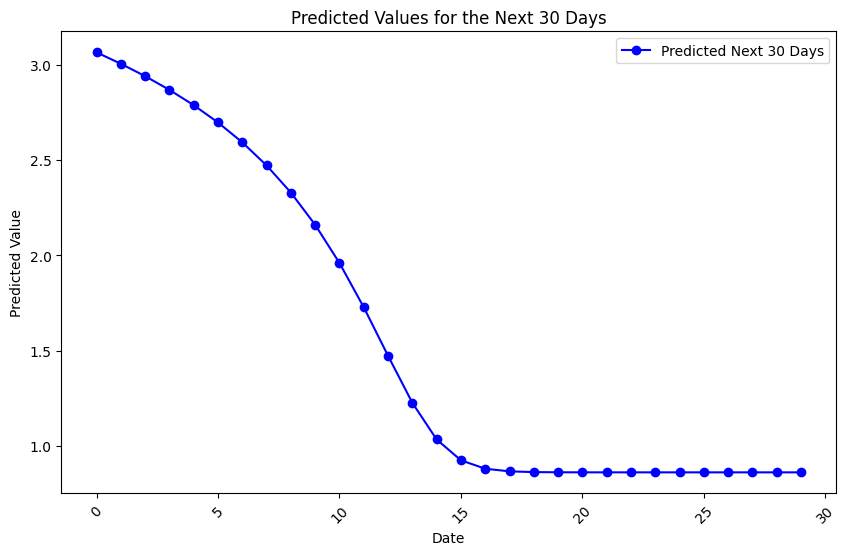

In [84]:

# Vẽ biểu đồ
plt.figure(figsize=(10, 6)) # Set the figure size
plt.plot(x_next_30_days, marker='o', color='b', label='Predicted Next 30 Days')

# Đặt tiêu đề và nhãn
plt.title('Predicted Values for the Next 30 Days')
plt.xlabel('Date')
plt.ylabel('Predicted Value')
plt.xticks(rotation=45) # Rotate x-axis labels for better readability
plt.legend()

# Hiển thị biểu đồ
plt.show()

In [85]:
# Chuyển cột predict price thành mảng 2 chiều
y_pred = y_pred.reshape(-1,1)

In [86]:
from sklearn.metrics import mean_absolute_percentage_error,mean_absolute_error
# 7. Đánh giá độ chính xác test bằng RMSE, MAE , MAPE
# RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)
# MAPE
test_mape = mean_absolute_percentage_error(y_test,y_pred)
print('Testing MAPE:', test_mape)
# MAE
test_mae = mean_absolute_error(y_test,y_pred)
print('Testing MAE:', test_mae)

Testing RMSE: Close    0.033358
dtype: float64
Testing MAPE: 0.006134381706656535
Testing MAE: 0.026579269238594314


In [87]:
# Tạo index cho 30 ngày tiếp theo
last_index =  df.index[-1]
next_30_dates = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

Testing RMSE: Close    0.033358
dtype: float64
Testing MAPE: 0.006134381706656535
Testing MAE: 0.026579269238594314


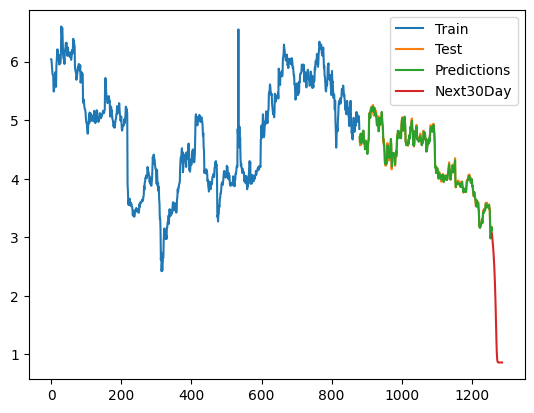

In [88]:
# 8. Tính RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)
# MAPE
test_mape = mean_absolute_percentage_error(y_test,y_pred)
print('Testing MAPE:', test_mape)
# MAE
test_mae = mean_absolute_error(y_test,y_pred)
print('Testing MAE:', test_mae)

# 9.Vẽ hình

plt.plot(y_train_index, y_train)
plt.plot(y_test.index, y_test)
plt.plot(y_test.index, y_pred)
plt.plot(next_30_dates,x_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()